# 0. Вводные положения 

**В рамках текущего исследования поставленны следующие задачи:**
1. Подготовить и обработать данные для исследовательского анализа
2. В рамках исследовательского анализа:
* Оценить, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Выявить, за какой характерный срок появляются новые и исчезают старые платформы.
* Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
* Оценить, как влияют на продажи отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.
* Оценить общее распределение игр по жанрам. Выделяются ли жанры с высокими и низкими продажами?
3. Составить портрет пользователя каждого региона.
Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). 
* Самые популярные жанры (топ-5). 
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?
4. Проверить гипотезы:
*Гипотеза №1*

H_0: Средние пользовательские рейтинги платформ Xbox One = Средние пользовательские рейтинги платформы PC

H_a: Средние пользовательские рейтинги платформ Xbox One ≠ Средние пользовательские рейтинги платформы PC

*Гипотеза №2*

H_0: Средние пользовательские рейтинги жанра Action ≠ Средние пользовательские рейтинги жанра Sports

H_a: Средние пользовательские рейтинги жанра Action = Средние пользовательские жанра Sports

# 1. Импорт данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/games.csv', delimiter=',')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


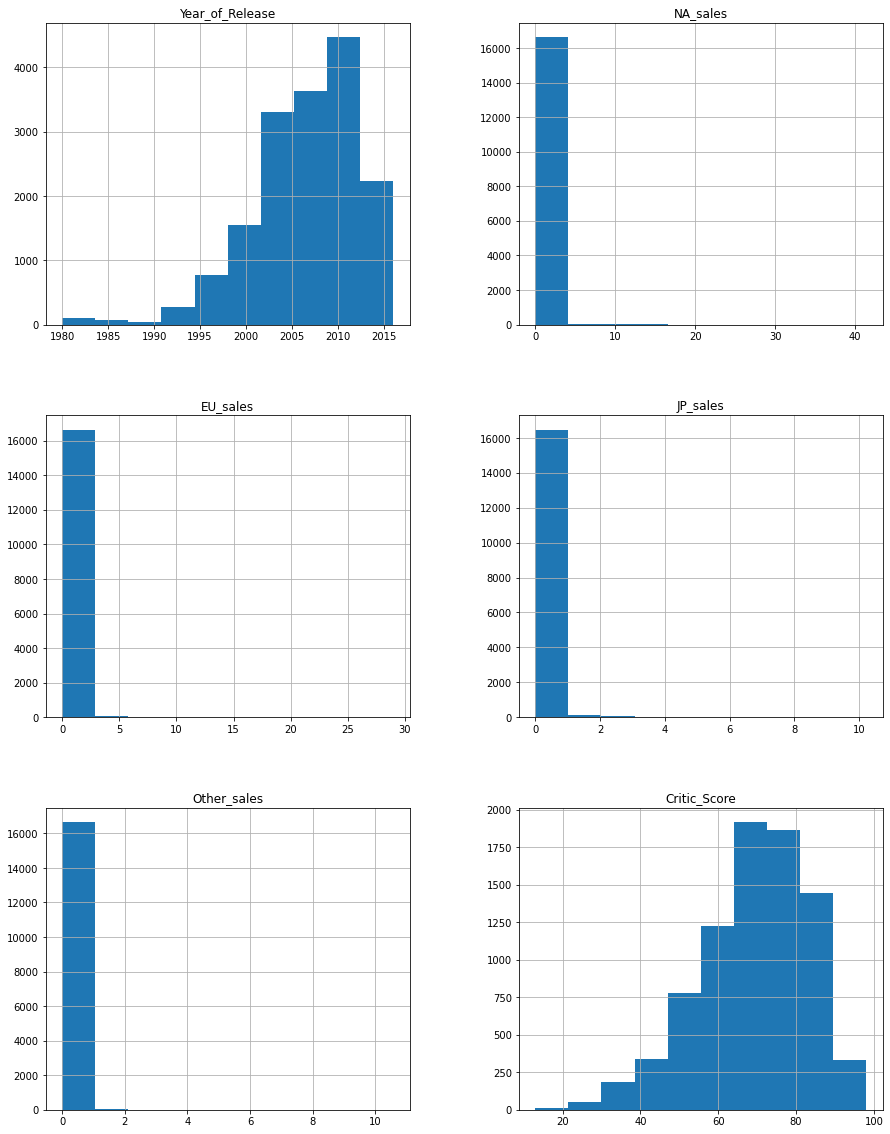

In [3]:
data.hist(figsize=(15, 20));

В целом, данные достаточно полные. Наибольшее количество пропусков сосредоточено в части оценок пользователей, критиков и рейтингах. Приступаем к обработке данных.

# 2. Подготовка данных

**Переименовываем колонки таблицы**

In [4]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Обрабатываем пропуски**

In [5]:
#print(data['year_of_release'].unique())
print(data['year_of_release'].isna().sum())
data = data.dropna(axis='index', how='any', subset=['year_of_release'])
data['year_of_release'] = data['year_of_release'].astype('int')
print(data['year_of_release'].isna().sum())
display(data.head())

269
0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Не имея данных о дате выхода игры, мы не можем применить их в нашем исследовании, это один из ключевых показателей. Такие строки были дропнуты без зазрения совести. Заодно, обрабатываем столбец, приводим к виду, чтобы отражался только год выхода игры.

**Смотрим другие столбцы**

In [6]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [7]:
data['genre'].unique()
data['genre'].isna().sum()

2

Жанровая принадлежность игры также важный для анализа показатель, такие пропуски заполнить ничем нельзя. Потерять две строки для нашего набора не страшно.

In [8]:
data = data.dropna(axis='index', how='any', subset=['genre'])
data['genre'].isna().sum()


0

In [9]:
print(data['rating'].value_counts())
print('Пустых значений:', data['rating'].isna().sum())

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64
Пустых значений: 6676


In [10]:
data['rating'] = data['rating'].fillna('unknown')

In [11]:
data['name'].isna().sum()

0

In [12]:
data['user_score'].unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd - to be determined, т.е. будет определено позднее. Значит значение отсутвует, заменим его на nan.
В данной колонке содержатся уникальные значение пользовательского рейтинга для каждой игры, удалять, заполнять эти строки - категорически нельзя.

In [13]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'].unique()
data['user_score'] = data['user_score'].astype('float')

**Добавляем в таблицу столбец, в котором будет отображаться сумма продаж игры на всех рынках**

In [14]:
#data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


# 3. Исследовательский анализ данных

**Оценим данные по выходу игр по годам**

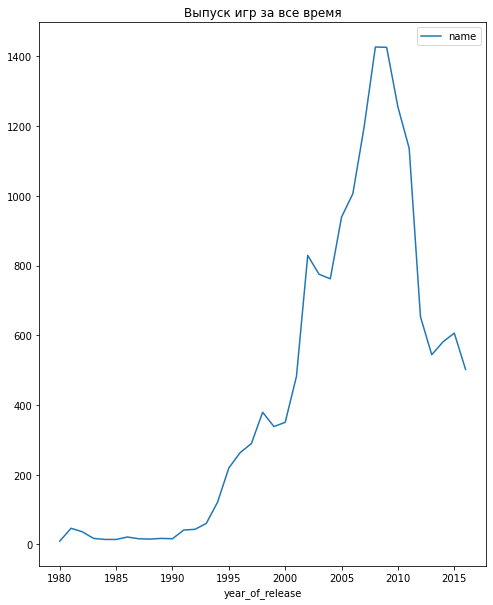

In [15]:
pivot_games_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
pivot_games_per_year = pivot_games_per_year.plot.line(y='name', figsize=(8,10), title='Выпуск игр за все время');

1. Активно рынок начал расти с 1994 года
2. По количеству игр наиболее продуктивными годами стали 2005-2011 (В целом, экономический кризис развернул динамику прироста игр)
3. С 2012 по 2016 количество держится в примерном коридоре 500-600 игр (+/-). Было бы интересно просмотреть данные на поздние годы

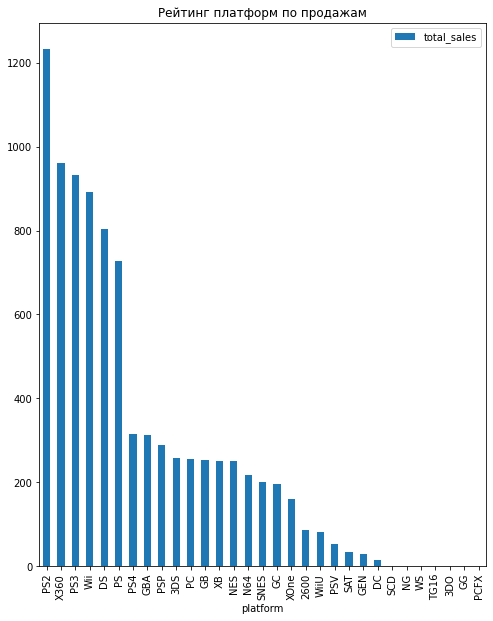

In [16]:
platforms_pivot = (data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                   .sort_values(by='total_sales', ascending=False))
platforms_pivot.plot.bar(y='total_sales', figsize=(8,10), title='Рейтинг платформ по продажам');

In [17]:
platforms_pivot = platforms_pivot.sort_values(by='total_sales', ascending = False)
print(platforms_pivot.head(10))

          total_sales
platform             
PS2           1233.56
X360           961.24
PS3            931.34
Wii            891.18
DS             802.78
PS             727.58
PS4            314.14
GBA            312.88
PSP            289.53
3DS            257.81


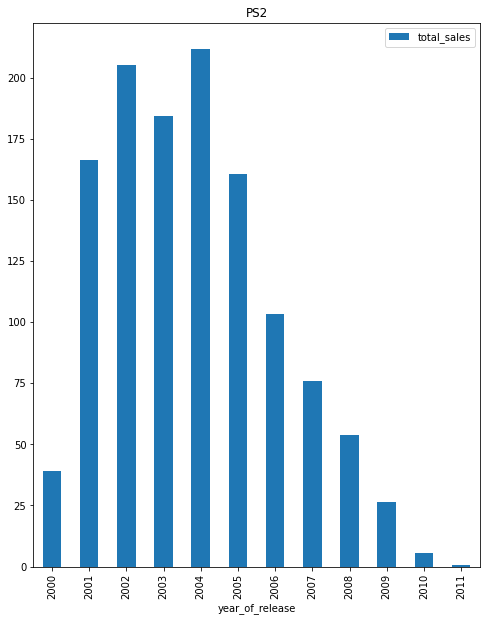

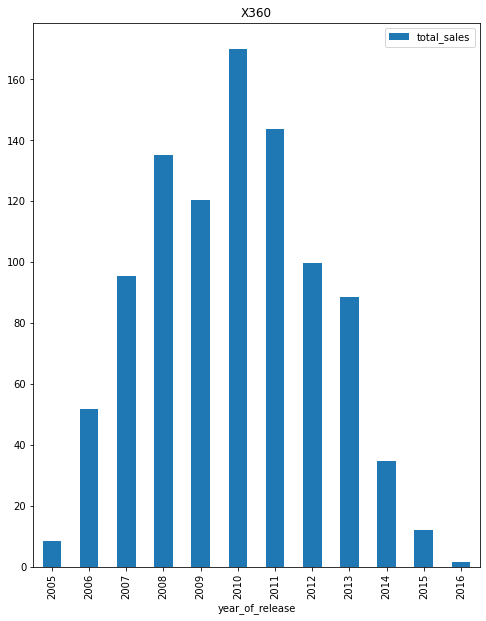

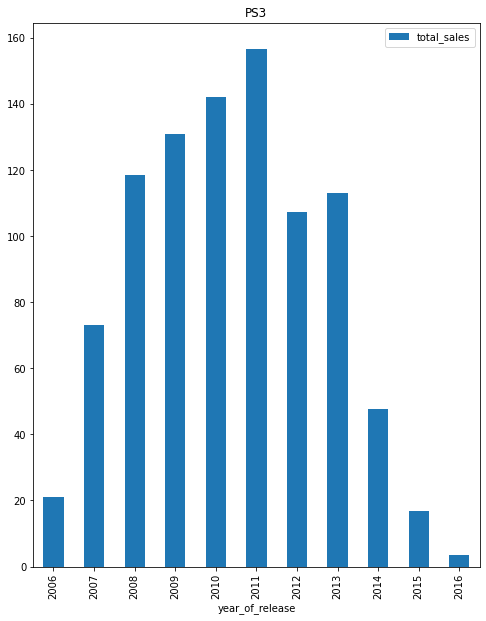

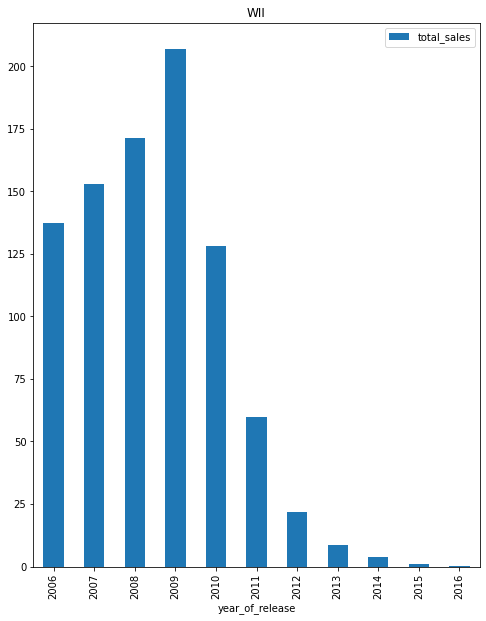

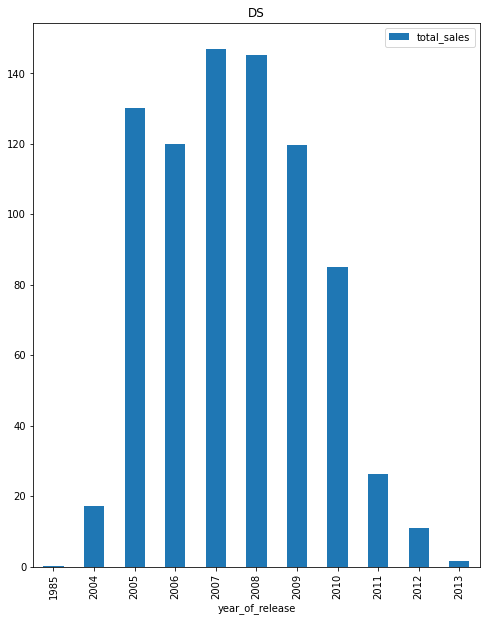

In [18]:
ps2_sales = data[data['platform'] == 'PS2'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
ps2_sales.plot.bar(y='total_sales', figsize=(8,10), title='PS2');

X360_sales = data[data['platform'] == 'X360'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
X360_sales.plot.bar(y='total_sales', figsize=(8,10), title='X360');

PS3_sales = data[data['platform'] == 'PS3'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
PS3_sales.plot.bar(y='total_sales', figsize=(8,10), title='PS3');

Wii_sales = data[data['platform'] == 'Wii'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
Wii_sales.plot.bar(y='total_sales', figsize=(8,10), title='WII');

DS_sales = data[data['platform'] == 'DS'].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
DS_sales.plot.bar(y='total_sales', figsize=(8,10), title='DS');

**Основные выводы:**
1. Исторический рекордсмен продаж: PS2 (1233.56 млн. $)
2. Примерный срок жизни консоли на рынке - 10 лет, из которых 6 лет приходится на активные продажи.
3. Новое поколение консолей еще не успели набрать обороты (XOne и PS4), и соответственно в топ не попали.

В дальнейшем иследовании нам понядобятся только актуальные данные. Так как игровая индустрия весьма динамическая отрасль, возьмем данные за последние 3 года.

In [19]:
new_data = data.query('year_of_release > 2013')
display(new_data.head())
print(len(new_data))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98


1689


Всего в выборку попало 1689 игр.

In [20]:
nd_platforms_sales = new_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
nd_platforms_sales = nd_platforms_sales.sort_values(by='total_sales', ascending = False)
print(nd_platforms_sales.head())

          total_sales
platform             
PS4            288.15
XOne           140.36
3DS             86.68
PS3             68.18
X360            48.22


В текущее временном периоде лидерами продаж являются как раз таки новые поколения консолей (Господи, мой мозг до сих пор воспринимает четвертую соньку как новую консоль, десять лет прошло, куда время бежит).

Посмотрим по каждой платформе диаграмму размаха.


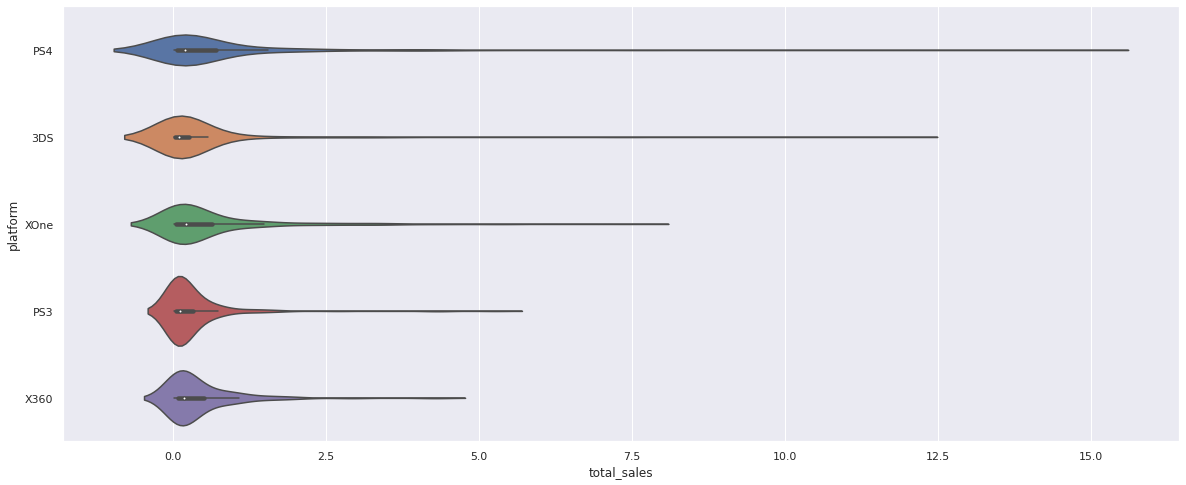

In [21]:
boxplot_data = new_data.query('platform in ["PS4", "PS3", "X360", "3DS", "XOne"]')
#boxplot = boxplot_data.boxplot(column='total_sales', by='platform') 
sns.set(rc={"figure.figsize":( 20,8)})
sns.violinplot( x=boxplot_data["total_sales"], y=boxplot_data["platform"]);

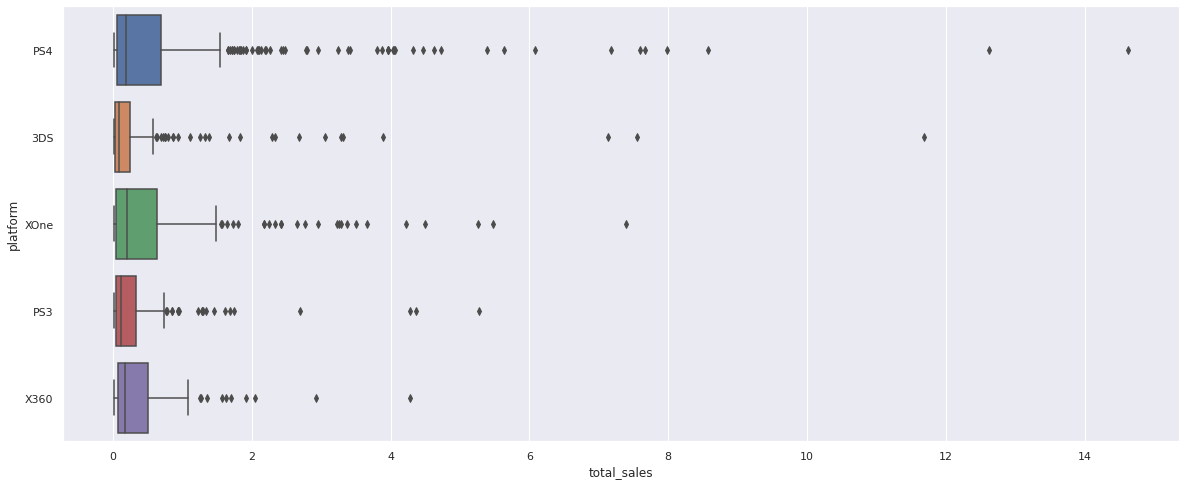

In [22]:
sns.set(rc={"figure.figsize":( 20,8)})
sns.boxplot(x=boxplot_data["total_sales"], y=boxplot_data["platform"]);

Построим 2 типа диаграм - скрипку и класический ящик с усами. На скрипке удобнее смотреть распределение значений внуири диапазона, на классическом графике удобнее смотреть выбросы.

Основные выводы:
1. В среднем, наиболее доходные игры показывают PS4 и XOne.
2. Количество игр, которые зарабатывают больше чем основная масса игр, больше именно на платформе PS4. Вероятно, сказывается политика эксклюзивности для ряда игр этой платформы (В 2023 правда за Сони можно поставить свечку, Майкрософт запылесосил рынок гейм-дева)
3. 3DS в целом тоже живет за счет крупных тайтлов и проектов, в среднем доходность проектов на платформе низкая.

**Смотрим корелялцию**

Корреляция между продажами и рейтингом экспертов.

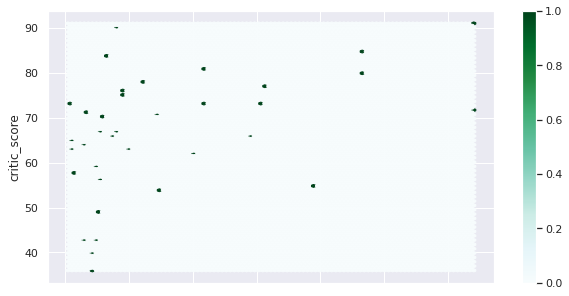

In [23]:
ps3_corr = new_data.query('platform == "PS3"')
ps3_corr.plot(x='total_sales', y='critic_score', kind='hexbin', figsize=(10,5));

In [24]:
print(ps3_corr['total_sales'].corr(ps3_corr['critic_score']))

0.44657460493190704


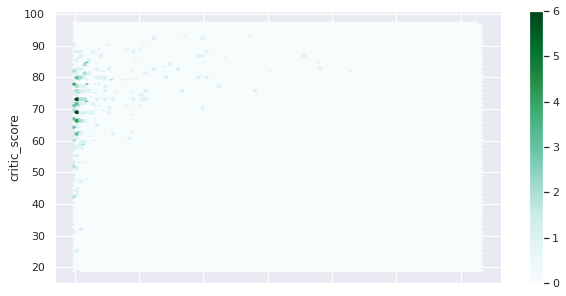

In [25]:
ps4_corr = new_data.query('platform == "PS4"')
ps4_corr.plot(x='total_sales', y='critic_score', kind='hexbin', figsize=(10,5));

In [26]:
print(ps4_corr['total_sales'].corr(ps4_corr['critic_score']))

0.40266141068104083


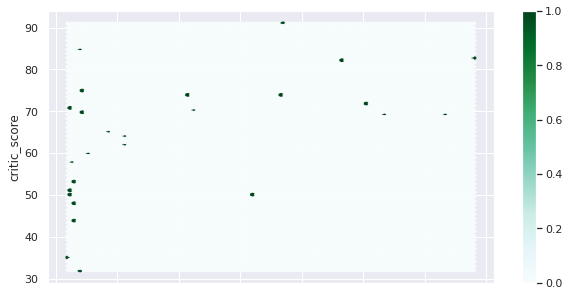

In [27]:
X360_corr = new_data.query('platform == "X360"')
X360_corr.plot(x='total_sales', y='critic_score', kind='hexbin', figsize=(10,5));

In [28]:
print(X360_corr['total_sales'].corr(X360_corr['critic_score']))

0.5257228356581523


0.31411749286905105


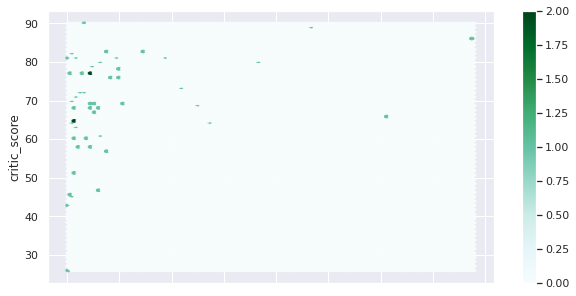

In [29]:
ds_corr = new_data.query('platform == "3DS"')
ds_corr.plot(x='total_sales', y='critic_score', kind='hexbin', figsize=(10,5));
print(ds_corr['total_sales'].corr(ds_corr['critic_score']))

0.42867694370333226


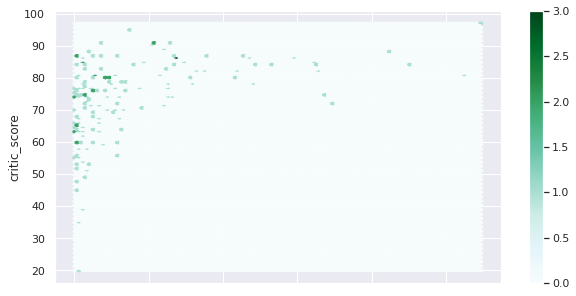

In [30]:
xone_corr = new_data.query('platform == "XOne"')
xone_corr.plot(x='total_sales', y='critic_score', kind='hexbin', figsize=(10,5));
print(xone_corr['total_sales'].corr(xone_corr['critic_score']))

**Вывод:** В результате проверки корреляции между оценками экспертов и продажами на различных платформах *связи не выявлено.* ~К счастью.~

Корреляция между продажами и рейтингом пользователей.

-0.16676141347662116


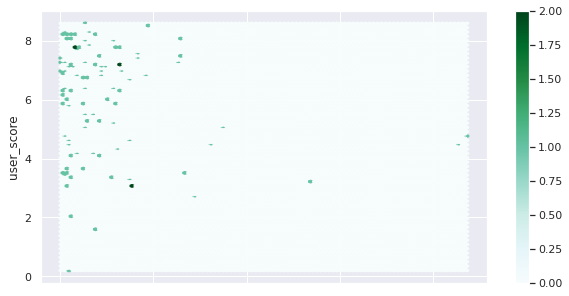

In [31]:
ps3_corr.plot(x='total_sales', y='user_score', kind='hexbin', figsize=(10,5));
print(ps3_corr['total_sales'].corr(ps3_corr['user_score']))

-0.040131589472697356


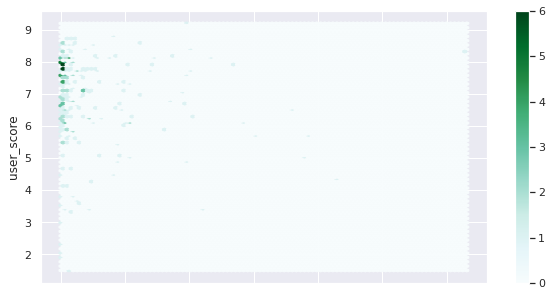

In [32]:
ps4_corr.plot(x='total_sales', y='user_score', kind='hexbin', figsize=(10,5));
print(ps4_corr['total_sales'].corr(ps4_corr['user_score']))

-0.138444570945665


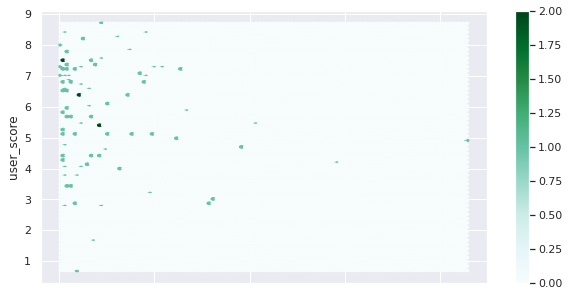

In [33]:
X360_corr.plot(x='total_sales', y='user_score', kind='hexbin', figsize=(10,5));
print(X360_corr['total_sales'].corr(X360_corr['user_score']))

0.2151932718527028


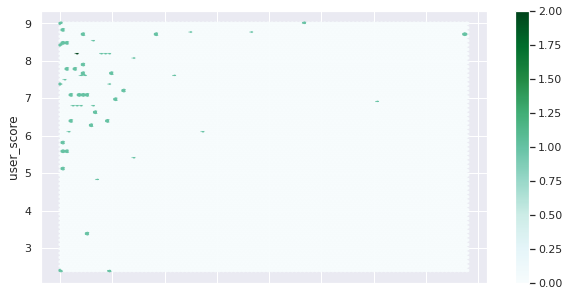

In [34]:
ds_corr.plot(x='total_sales', y='user_score', kind='hexbin', figsize=(10,5));
print(ds_corr['total_sales'].corr(ds_corr['user_score']))

**Вывод:** Пользовательские рейтинги точно также не имеют взаимосвязи с продажами.

**Общее распределение игр по жанрам.**

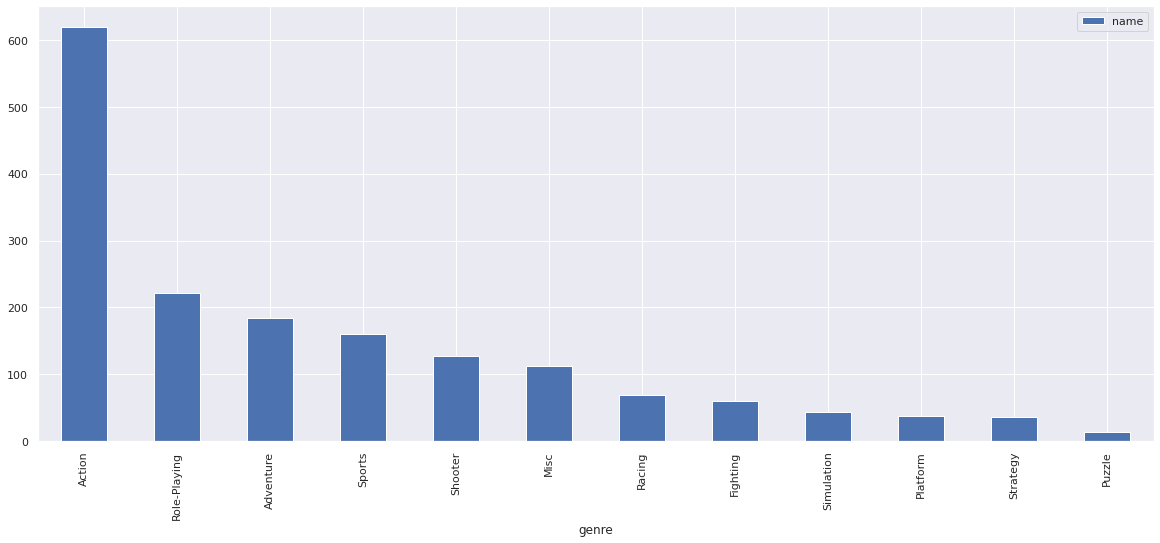

In [35]:
genre_pivot = (new_data.pivot_table(index='genre', values='name', aggfunc='count')
               .sort_values(by='name', ascending = False))
genre_pivot.plot.bar(y='name');

По количеству игр в лидеры выбивается жанр Action. Но являются ли лидеры графика лидерами по продажам?

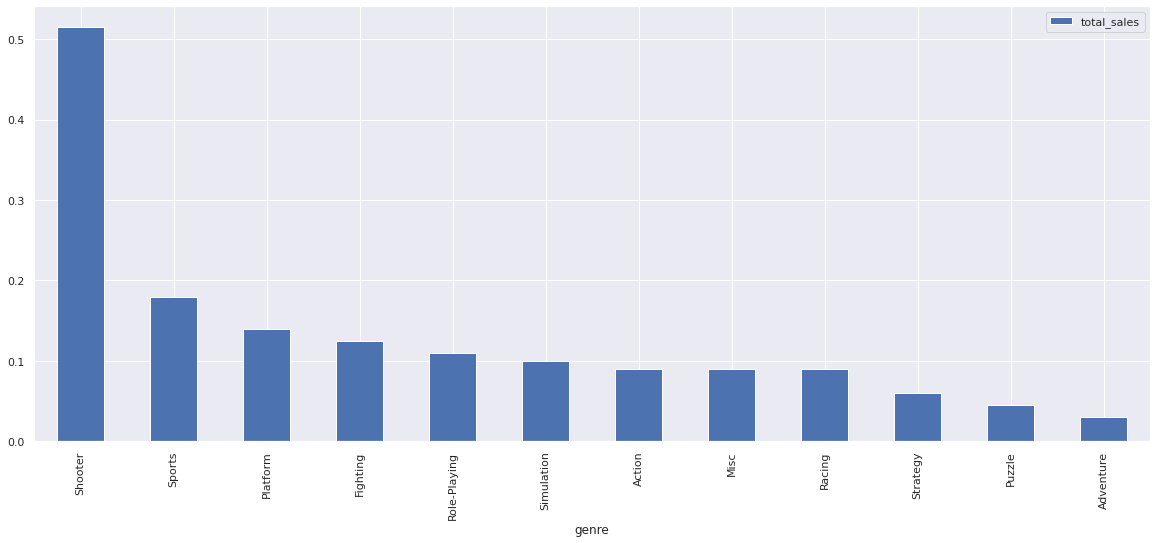

In [36]:
genre_pv_sales = (new_data.pivot_table(index='genre', values='total_sales', aggfunc='median')
                  .sort_values(by='total_sales', ascending = False))
genre_pv_sales.plot.bar(y='total_sales');

Нет, наиболее доходными жанрами являются шутеры ~(Привет эпоха батл-роялей)~, спорт.симы и платформеры

# 4.Типичный портрет региона

**Северная Америка**

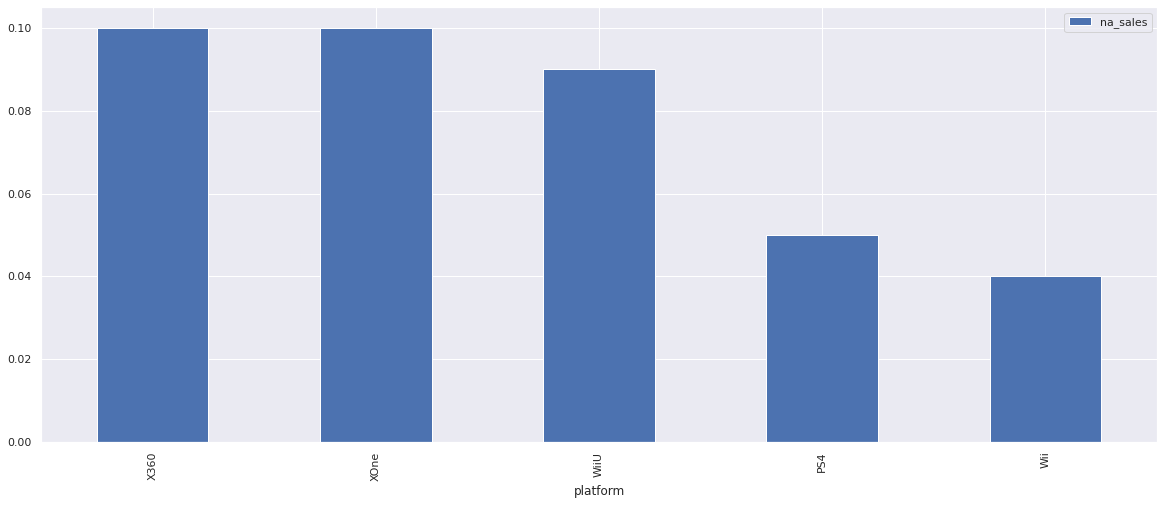

In [37]:

na_platforms = (new_data.pivot_table(index='platform', values='na_sales', aggfunc='median')
                .sort_values(by='na_sales', ascending=False)).head()

na_platforms.plot.bar(y='na_sales');


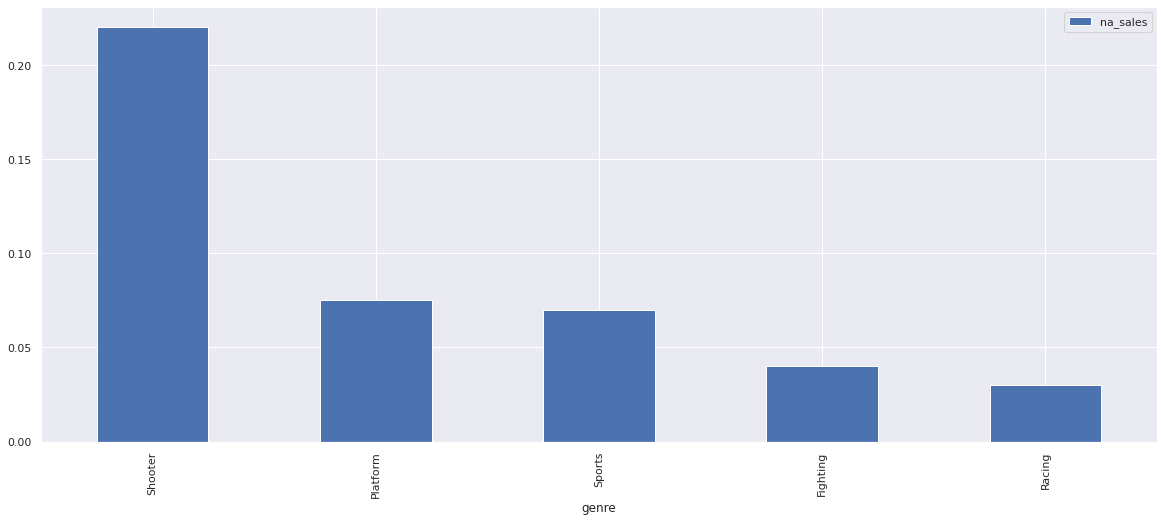

In [38]:
na_genres = (new_data.pivot_table(index='genre', values='na_sales', aggfunc='median')
             .sort_values(by='na_sales', ascending=False).head())
na_genres.plot.bar(y='na_sales');

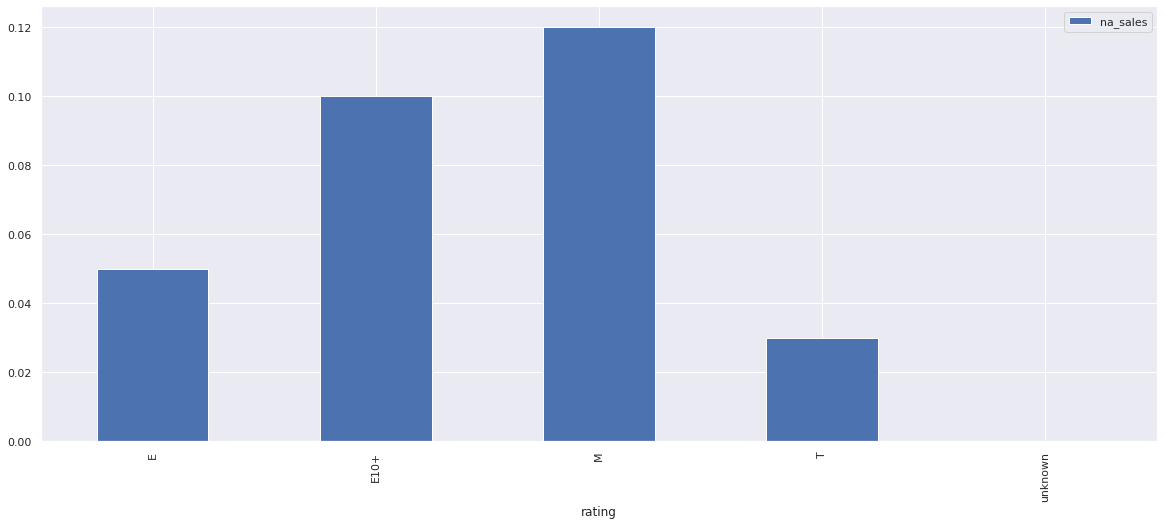

In [39]:
na_rating = new_data.pivot_table(index='rating', values='na_sales', aggfunc='median')
na_rating.plot.bar(y='na_sales');

**Портрет региона:** В данном временном отрезке пользователь предпочитает играть в шутеры на "отечественных" платформах, либо на WII U. Наиболее ходовые возрастные рейтинги от 10 лет и от 18 лет.

**Европа**

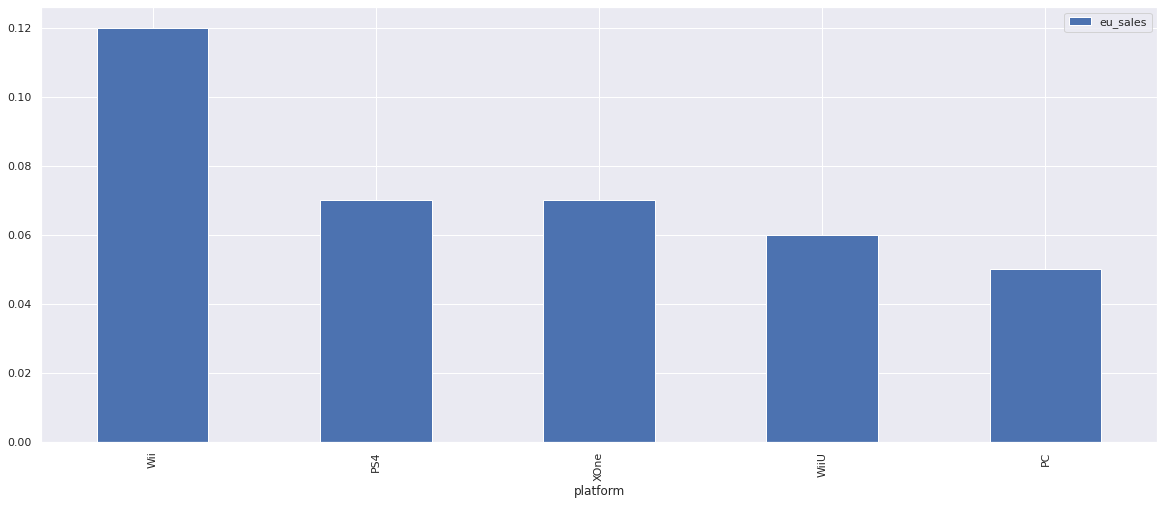

In [40]:
eu_platforms = (new_data.pivot_table(index='platform', values='eu_sales', aggfunc='median')
                .sort_values(by='eu_sales', ascending=False).head())
eu_platforms.plot.bar(y='eu_sales');

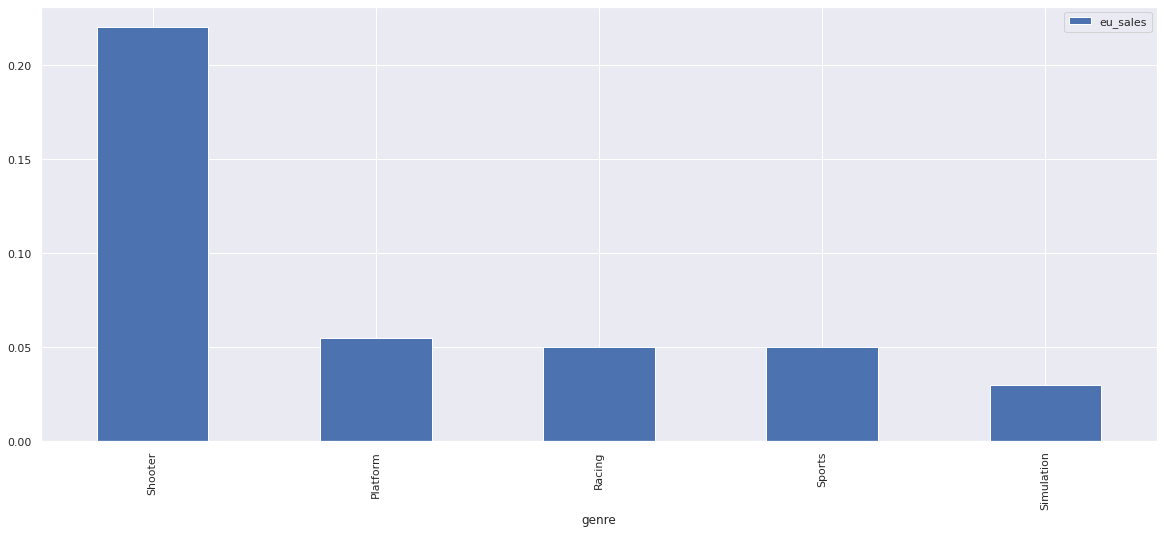

In [41]:
eu_genres = (new_data.pivot_table(index='genre', values='eu_sales', aggfunc='median')
             .sort_values(by='eu_sales', ascending=False).head())
eu_genres.plot.bar(y='eu_sales');

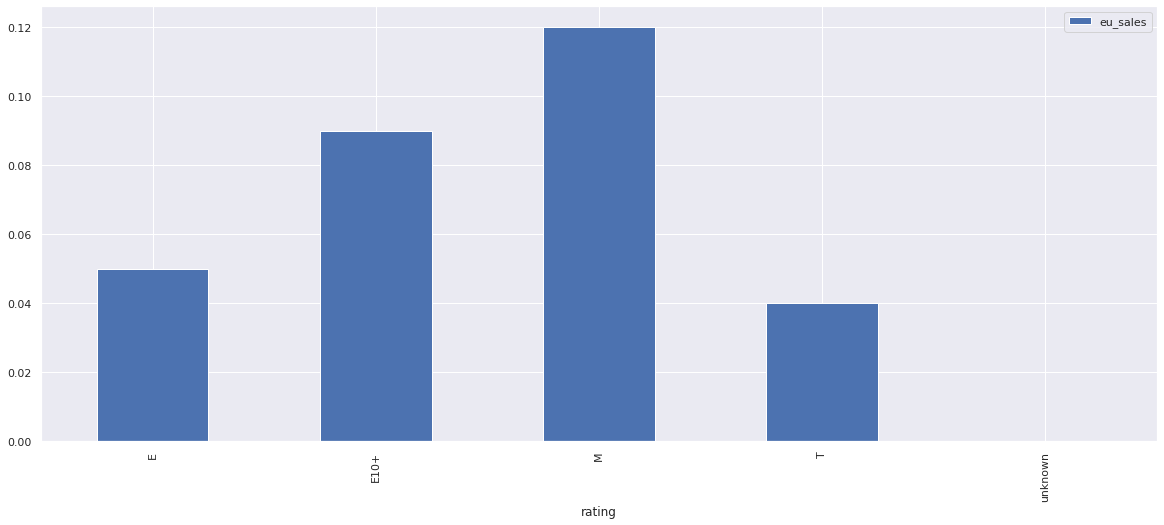

In [42]:
eu_rating = new_data.pivot_table(index='rating', values='eu_sales', aggfunc='median')
eu_rating.plot.bar(y='eu_sales');

**Портрет региона:** Внезапно лучшие показатели по медианному значению демонстрирует консоль предыдущего поколения, но 8 поколение консолей между собой имеет не особо большой разрыв. Так же в топ-5 представлены ПК-бояре с весьма уверенным результатом. В целом, как и американский потребитель, европейцы предпочитают шутеры, но вместо файтингов больше ориентированы на симуляторы и гонки. Распределение по возрастному рейтингу весьма схоже.

**Япония**

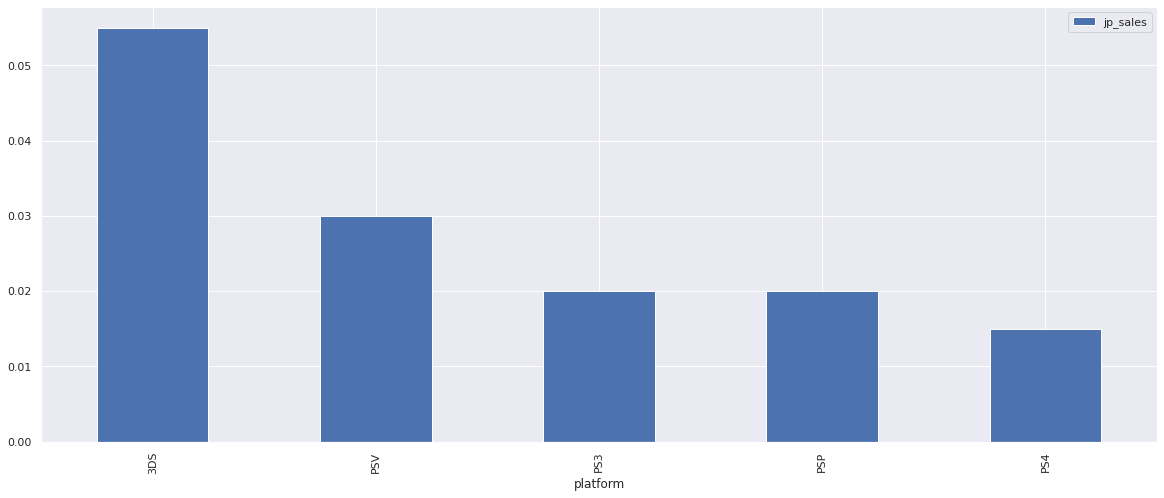

In [43]:
jp_platforms = (new_data.pivot_table(index='platform', values='jp_sales', aggfunc='median')
                .sort_values(by='jp_sales', ascending=False).head())
jp_platforms.plot.bar(y='jp_sales');

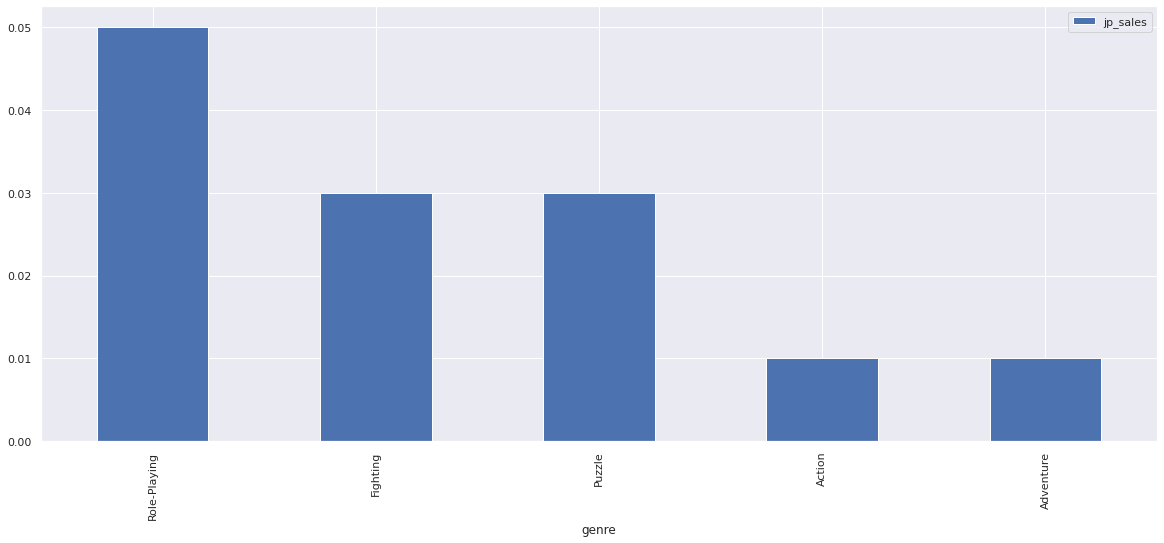

In [44]:
jp_genres = (new_data.pivot_table(index='genre', values='jp_sales', aggfunc='median')
             .sort_values(by='jp_sales', ascending=False).head())
jp_genres.plot.bar(y='jp_sales');

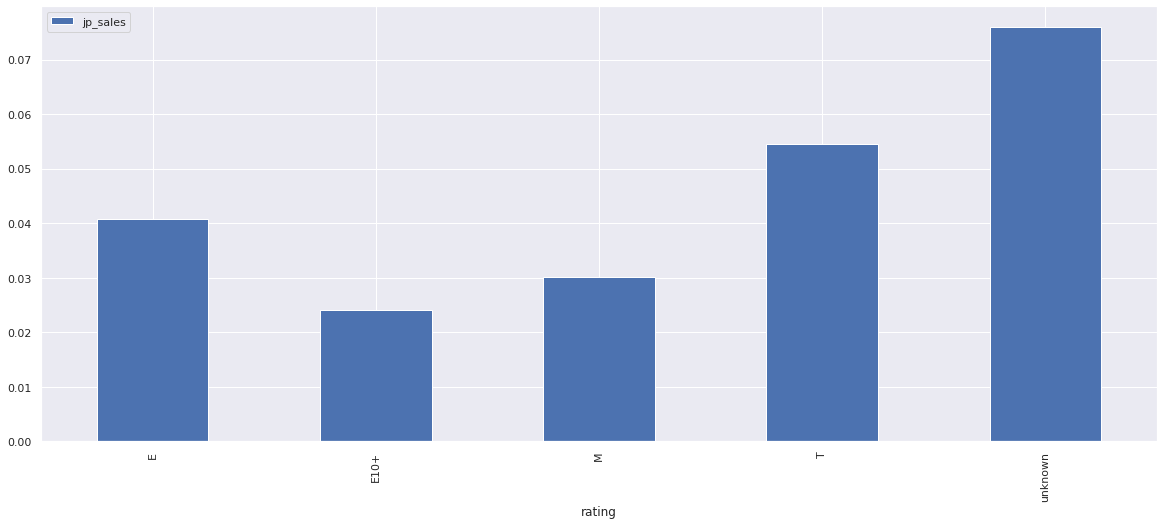

In [45]:
jp_rating = new_data.pivot_table(index='rating', values='jp_sales', aggfunc='mean')
jp_rating.plot.bar(y='jp_sales');


**Портрет региона:** Япония традиционно ведет себя кардинально другим образом, по сравнению с другими регионами. Во-первых, японский рынок - рынок портативных консолей: 3 из 5 платформ - портативные, 2 из них на первых местах в топе. Во-вторых, жанровое предпочтение тоже переворачивается с ног на голову. Если RPG-игры и файтинги в топе весьма понятны, то появление паззлов - открытие весьма неожиданное. Возрастной рейтинг смещается в сторону 0-18. Ня, каваии.

Если просмотреть игры с неизвестным рейтингом, то увидим тот факт, что эта категория превышает все остальные. Это связанно с тем, что в японии действует своя рейтинговая система CERO, невходящая в International Age Rating Coalition (IARC). Таким образом, из приведенного перечня японский рынок - единственный, в котором ESRB не влияет на продажи.

**Проверка гипотез**

**Гипотеза №1**

H_0: Средние пользовательские рейтинги платформ Xbox One = Средние пользовательские рейтинги платформы PC

H_a: Средние пользовательские рейтинги платформ Xbox One ≠ Средние пользовательские рейтинги платформы PC

alpha = 0.05

In [46]:
xone_rating = new_data[new_data['platform'] == 'XOne']['user_score']
pc_rating = new_data[new_data['platform'] == 'PC']['user_score']

xone_rating = xone_rating.dropna().astype('float')
pc_rating = pc_rating.dropna().astype('float')




In [47]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    xone_rating, 
    pc_rating,
    equal_var=False)

# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print('p-значение:', results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


**Пояснения**: Нулевая гипотеза сформулирована, грубо говоря самим условием задачи. Альтернативная гиотеза будет обратной нулевой, так как мы проверяем равенство средних, они либо равны, либо нет. Так как мы проверяем гипотезу о равенстве средних двух генеральных совокупностей, то применяем **ttest_ind**. Со второй гипотезой аналогично.

**Гипотеза №2**

H_0: Средние пользовательские рейтинги жанра Action ≠ Средние пользовательские рейтинги жанра Sports

H_a: Средние пользовательские рейтинги жанра Action = Средние пользовательские жанра Sports

alpha = 0.05

In [48]:
action_rating = new_data[new_data['genre'] == 'Action']['user_score']
sports_rating = new_data[new_data['genre'] == 'Sports']['user_score']


action_rating = action_rating.dropna().astype('float')
sports_rating = sports_rating.dropna().astype('float')

In [49]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    action_rating, 
    sports_rating,
    equal_var=False)

# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print('p-значение:', results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


# Итоговые выводы

**В рамках текущего исследования были поставленны следующие задачи:**
1. Подготовить и обработать данные для исследовательского анализа
2. В рамках исследовательского анализа:
* Оценить, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Выявить, за какой характерный срок появляются новые и исчезают старые платформы.
* Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
* Оценить, как влияют на продажи отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.
* Оценить общее распределение игр по жанрам. Выделяются ли жанры с высокими и низкими продажами?
3. Составить портрет пользователя каждого региона.
Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). 
* Самые популярные жанры (топ-5). 
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?
4. Проверить гипотезы:
*Гипотеза №1*

H_0: Средние пользовательские рейтинги платформ Xbox One = Средние пользовательские рейтинги платформы PC

H_a: Средние пользовательские рейтинги платформ Xbox One ≠ Средние пользовательские рейтинги платформы PC

*Гипотеза №2*

H_0: Средние пользовательские рейтинги жанра Action ≠ Средние пользовательские рейтинги жанра Sports

H_a: Средние пользовательские рейтинги жанра Action = Средние пользовательские жанра Sports

**В итоге, получены следующие результаты.**
1. Примерный срок жизни консоли на рынке - 10 лет, из которых 6 лет приходится на активные продажи.
* Новое поколение консолей еще не успели набрать обороты (XOne и PS4), и соответственно в общих топах по продажам ярко не представленны. Однако при анализе актуального периода данных новое поколение консолей уже заняли доминирующее положение на рынке.
* Оценки критиков и пользователей не имеют взаимосвязи с продажами в данном временном промежутке.
* Наиболее продаваемым жанром являются Шутеры, с большим отрывом от прочих жанров. Вторые по популярности - спортивные симуляторы, однако отрыв от других жанров уже не настолько значительный.

2. В целом, европейский и американский рынки имеют общие точки соприкосновения, но имеют ряд особенностей. Японский рынок кардинально отличается от остальных:
* В данном временном отрезке американский пользователь предпочитает играть в шутеры, платформеры и спортсимы на "отечественных" платформах, либо на WII U. Наиболее ходовые возрастные рейтинги от 10 лет и от 18 лет.
*  К особенностям европейского пользователя можно отнести более лучшие показатели по медианному значению консоли предыдущего поколения, но 8 поколение консолей между собой имеет не особо большой разрыв по продажам. Также, в топ-5 представлены ПК-геймеры с весьма уверенным результатом. В целом, как и американский потребитель, европейцы предпочитают шутеры, но вместо файтингов больше ориентированы на симуляторы и гонки. Распределение по возрастному рейтингу весьма схоже.
* Япония традиционно ведет себя кардинально другим образом, по сравнению с другими регионами. Во-первых, японский рынок - рынок портативных консолей: 3 из 5 платформ - портативные, 2 из них на первых местах в топе. Во-вторых, жанровое предпочтение тоже переворачивается с ног на голову. Если RPG-игры и файтинги в топе весьма понятны, то появление паззлов - открытие весьма неожиданное. Возрастной рейтинг смещается в сторону 0-18. Если просмотреть игры с неизвестным рейтингом, то увидим тот факт, что эта категория превышает все остальные. Это связанно с тем, что в японии действует своя рейтинговая система CERO, невходящая в International Age Rating Coalition (IARC). Таким образом, из приведенного перечня японский рынок - единственный, в котором ESRB не влияет на продажи.

3. Проверка гипотез подтвердила, что:
* Средние пользовательские рейтинги платформ Xbox One = Средние пользовательские рейтинги платформы PC
* Средние пользовательские рейтинги жанра Action = Средние пользовательские жанра Sports

